---

# Assignment 1: Data Cleaning and Exploration with Pandas

This assignment mirrors a realistic data science task: you will work with a real dataset that might or might not have been properly curated (cleaned, evaluated etc.). The dataset captures discussions on Reddit (from the subreddit r/Ukraine) on the currently ongoing war in Ukraine.

You are asked to implement a number of stages of the data science process: data cleaning and data exploration. You are required to use pandas for these tasks. We get you started below by providing the code to read the data from a gzip file into a dataframe. Note that the file is quite large as it records the threads of discussions and the corresponding comments during a number of days in April 2022.

Original data (and much more than provided here) is [available](https://www.kaggle.com/code/bwandowando/quick-exploration-of-r-ukraine-csv-dataset) on Kaggle, along with a [quick exploration of the entire dataset](https://www.kaggle.com/code/bwandowando/quick-exploration-of-r-ukraine-csv-dataset). You do not have to check these resources, they are provided here for transparency.

The graded questions are marked with Q1 to Q12 below. Complete the assignment and submit your jupyter notebook on Canvas.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data into Dataframe

Place the data file in the same directory with your notebook or change the first argument of read_csv() to the correct path to the file.

In [ ]:
df = pd.read_csv("RedditUkraineThreadsAndComments_20220411-102200.csv.gzip",
                 compression="gzip", # specify file compression type, if any
                 index_col=0,        # force pandas to not use the 1st column as index
                 low_memory=False)

## Have a quick look of the data records using head()

Reddit discussions contains posts and comments. Each comment is posted under the original post (called 'thread' in this dataset) either as a direct comment to the message that started the discussions or as a comment to a comment.

In [ ]:
"""
The format of the data is at the comment level.
That is, each row represents a comment_id and thread information
will be duplicated for comments corresponding to the same thread
"""
df.head()

,thread_author,thread_created_utc,thread_distinguished,thread_edited,thread_id,thread_is_original_content,thread_is_self,thread_link_flair_text,thread_locked,thread_name,...,comment_edited,comment_id,comment_is_submitter,comment_link_id,comment_parent_id,comment_permalink,comment_saved,comment_score,comment_stickied,comment_extracted_utc
0,boskee,2022-04-03 15:48:15,NaN,2022-04-03 17:32:12.000000,tvc9kq,False,True,WAR,False,t3_tvc9kq,...,1970-01-01 00:00:00.000000,i38haxl,False,t3_tvc9kq,t3_tvc9kq,/r/ukraine/comments/tvc9kq/russian_state_news_...,False,3,False,2022-04-11 07:35:23.548048
1,boskee,2022-04-03 15:48:15,NaN,2022-04-03 17:32:12.000000,tvc9kq,False,True,WAR,False,t3_tvc9kq,...,1970-01-01 00:00:00.000000,i38he2n,False,t3_tvc9kq,t3_tvc9kq,/r/ukraine/comments/tvc9kq/russian_state_news_...,False,123,False,2022-04-11 07:34:43.409877
2,boskee,2022-04-03 15:48:15,NaN,2022-04-03 17:32:12.000000,tvc9kq,False,True,WAR,False,t3_tvc9kq,...,2022-04-03 15:55:52.000000,i38hfns,True,t3_tvc9kq,t3_tvc9kq,/r/ukraine/comments/tvc9kq/russian_state_news_...,False,295,False,2022-04-11 07:34:38.733292
3,boskee,2022-04-03 15:48:15,NaN,2022-04-03 17:32:12.000000,tvc9kq,False,True,WAR,False,t3_tvc9kq,...,1970-01-01 00:00:00.000000,i38hkx2,False,t3_tvc9kq,t3_tvc9kq,/r/ukraine/comments/tvc9kq/russian_state_news_...,False,653,False,2022-04-11 07:34:37.722354
4,boskee,2022-04-03 15:48:15,NaN,2022-04-03 17:32:12.000000,tvc9kq,False,True,WAR,False,t3_tvc9kq,...,2022-04-03 16:11:08.000000,i38hkzt,False,t3_tvc9kq,t3_tvc9kq,/r/ukraine/comments/tvc9kq/russian_state_news_...,False,2637,False,2022-04-11 07:34:37.471237


## Q1. Check what columns are available in the data (5 points)

Note: Fields starting with 'thread' refer to Reddit posts, and fields starting with 'comment' correspond to responses belonging to a post.

In [ ]:
# YOUR CODE HERE
df.columns

Index(['thread_author', 'thread_created_utc', 'thread_distinguished',
       'thread_edited', 'thread_id', 'thread_is_original_content',
       'thread_is_self', 'thread_link_flair_text', 'thread_locked',
       'thread_name', 'thread_num_comments', 'thread_over_18',
       'thread_permalink', 'thread_poll_data', 'thread_score',
       'thread_selftext', 'thread_spoiler', 'thread_stickied', 'thread_title',
       'thread_upvote_ratio', 'thread_url', 'thread_extracted_utc',
       'comment_author', 'comment_body', 'comment_created_utc',
       'comment_distinguished', 'comment_edited', 'comment_id',
       'comment_is_submitter', 'comment_link_id', 'comment_parent_id',
       'comment_permalink', 'comment_saved', 'comment_score',
       'comment_stickied', 'comment_extracted_utc'],
      dtype='object')

## Q2. Check the data types of each column (5 points)

Note: 'Object' types correspond to columns with strings or mixed types

In [ ]:
# YOUR CODE HERE
df.dtypes

thread_author                  object
thread_created_utc             object
thread_distinguished           object
thread_edited                  object
thread_id                      object
thread_is_original_content       bool
thread_is_self                   bool
thread_link_flair_text         object
thread_locked                    bool
thread_name                    object
thread_num_comments             int64
thread_over_18                   bool
thread_permalink               object
thread_poll_data              float64
thread_score                    int64
thread_selftext                object
thread_spoiler                   bool
thread_stickied                  bool
thread_title                   object
thread_upvote_ratio           float64
thread_url                     object
thread_extracted_utc           object
comment_author                 object
comment_body                   object
comment_created_utc            object
comment_distinguished          object
comment_edit

## Q3. What is the number of unique threads and comments in the data? (10 points)

Hint: Check out nunique() function

In [ ]:

num_threads = 0 #replace 0 with your code to return number of unique threads
num_comments = 0 #replace 0 with your code to return number of unique threads

# YOUR CODE HERE
num_threads = df.thread_id.nunique()
num_comments = df.comment_id.nunique()

print("Number of threads:", num_threads)
print("Number of comments:", num_comments)



Number of threads: 4281
Number of comments: 153389


In [ ]:
assert(num_threads>0)
assert(num_comments>0)



# Data Cleaning

## Q4. How many duplicated records are in the data? (10 points)

In [ ]:
# num_dups should be the number of duplicated records/rows in our data. It is assigned a non-sense value for now, your task is to change it.

num_dups=-5

# YOUR CODE HERE

num_dups = df.duplicated().sum()

print("Number of duplicated records:", num_dups)

Number of duplicated records: 0


In [ ]:
assert(num_dups>=0)

0         False
1         False
2         False
3         False
4         False
          ...  
153384    False
153385    False
153386    False
153387    False
153388    False
Length: 153389, dtype: bool

## Q5. List the columns with missing values, if any, and indicate how many records are missing for each   (10 points)

Hint: Check out isna() in dataframes

In [ ]:
# keep your answer in drop_columns, intialized with [] to start with. Your task is to rewrite it.

drop_columns = []
# YOUR CODE HERE

drop_columns = df.columns[df.isna().sum()>0].tolist()
print(drop_columns)



['thread_distinguished', 'thread_link_flair_text', 'thread_poll_data', 'thread_selftext', 'comment_author', 'comment_distinguished']


In [ ]:
# print columns with missing values and corresponding number of records
df[drop_columns].isna().sum()

thread_distinguished      152076
thread_link_flair_text       110
thread_poll_data          153389
thread_selftext           125964
comment_author              2088
comment_distinguished     151255
dtype: int64

## Q6. Drop columns with missing values from the original Dataframe (10 points)

This task asks you to modify the df dataframe such that the columns with missing values that you identified in Q5 are removed. The intuition is that this solution to missing values will not affect your exploration later, mainly because you are not going to need/use those columns.

In [ ]:
# YOUR CODE HERE
df = df.drop(drop_columns, axis=1)



In [ ]:
assert(len(df.columns)<36)

AssertionError: 


# Data Exploration

## Q7. Create a plot (timeseries) that shows the number of threads per hour (10 points)

Hints: look at pd.to_datetime, pd.resample, pd.plot

### Number of threads per hour

Hints: look at pd.to_datetime, pd.resample, pd.plot

In [ ]:
time_field = "thread_created_utc"
thread_field = "thread_id"

columns = [thread_field, time_field] # identify relevant columns
df_threads = df[columns].copy() # subset original dataframe to include only relevant information
df_threads[time_field] = pd.to_datetime(df_threads[time_field]) # Convert the time column to a datetime object

time_gran = "H" # time granularity: use H if hourly, D if daily

df_threads = (df_threads
              .set_index(time_field)    # set the timing as the index of the dataframe
              .resample(time_gran)      # Use resample function to group data by time (e.g., days or hours)
              [thread_field]            # specify the column we need to aggregate/count
              .nunique()                # count the number of unique elements within each group
             )
df_threads

thread_created_utc
2022-04-03 15:00:00     1
2022-04-03 16:00:00     0
2022-04-03 17:00:00     0
2022-04-03 18:00:00     0
2022-04-03 19:00:00     0
                       ..
2022-04-11 05:00:00    16
2022-04-11 06:00:00    22
2022-04-11 07:00:00    17
2022-04-11 08:00:00    25
2022-04-11 09:00:00     7
Freq: H, Name: thread_id, Length: 187, dtype: int64

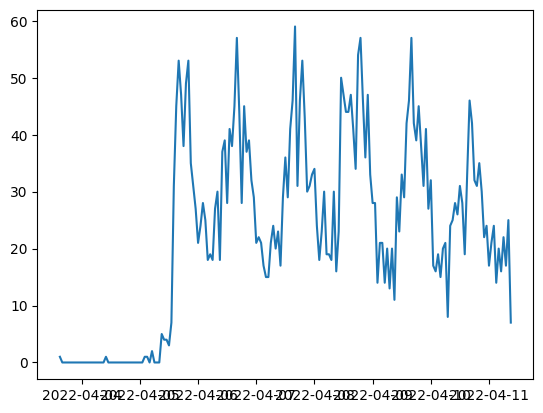

In [ ]:
# Plot the time series with the help of matplotlib
import matplotlib.pyplot as plt
# YOUR CODE HERE
plt.plot(df_threads)

## Q8: Create a plot (timeseries) that shows the number of comments per hour (10 points)

In [ ]:
"""
You likely have to adapt some of the steps above
"""

# YOUR CODE HERE
time_field = "comment_created_utc"
comment_field = "comment_id"

columns = [comment_field, time_field] # identify relevant columns
df_comments = df[columns].copy() # subset original dataframe to include only relevant information
df_comments[time_field] = pd.to_datetime(df_comments[time_field]) # Convert the time column to a datetime object

time_gran = "H" # time granularity: use H if hourly, D if daily

df_comments = (df_comments
              .set_index(time_field)    # set the timing as the index of the dataframe
              .resample(time_gran)      # Use resample function to group data by time (e.g., days or hours)
              [comment_field]            # specify the column we need to aggregate/count
              .nunique()                # count the number of unique elements within each group
             )
df_comments

comment_created_utc
2022-04-03 15:00:00     16
2022-04-03 16:00:00     50
2022-04-03 17:00:00     58
2022-04-03 18:00:00     53
2022-04-03 19:00:00     84
                      ... 
2022-04-11 05:00:00    671
2022-04-11 06:00:00    693
2022-04-11 07:00:00    528
2022-04-11 08:00:00    352
2022-04-11 09:00:00    212
Freq: H, Name: comment_id, Length: 187, dtype: int64

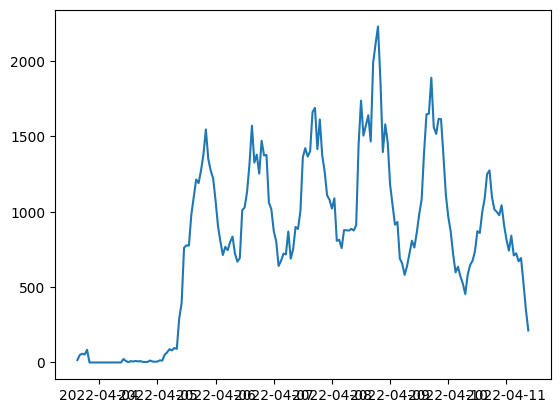

In [ ]:
plt.plot(df_comments)

## Q9. Identifying popularity through upvote ratio (10 points)

Reddit (like many other platforms) have a "like"-like feature, called upvotes. Find the top-20 threads with the highest upvote ratio and print some related user information (e.g., the author's Reddit handle).

Once you find the top-20 threads, create a list of strings containing the ids of these threads (thread_id)

Note: If there are more than 20 threads with the same upvote ratio, simply show the first 20 rows in the dataframe.

Hint: Check out pd.sort_values().

In [ ]:
top_20_thread_ids = [] # Create a list with the ids of the top-20 threads

# YOUR CODE HERE
top_20_thread_ids = df.groupby("thread_id")["thread_upvote_ratio"].mean().sort_values(ascending=False).head(20).index
display(df.groupby("thread_id")["thread_upvote_ratio"].mean().sort_values(ascending=False).head(20))
top_20_thread_ids = df.groupby("thread_id")["thread_upvote_ratio"].mean().sort_values(ascending=False).head(20).index.tolist()
print(top_20_thread_ids)
df[df["thread_id"].isin(top_20_thread_ids)].drop_duplicates(subset="thread_id", keep="first")


thread_id
tvc9kq    1.0
txgthi    1.0
u0amdp    1.0
txggj7    1.0
tyup9m    1.0
txgibc    1.0
txgkum    1.0
tyu0wm    1.0
tyu0bw    1.0
tyttsr    1.0
tytkgy    1.0
tythwz    1.0
tysv3v    1.0
tyxt16    1.0
tyssjr    1.0
txh024    1.0
txh0h5    1.0
tysljq    1.0
txh22f    1.0
tysa9v    1.0
Name: thread_upvote_ratio, dtype: float64

['tvc9kq', 'txgthi', 'u0amdp', 'txggj7', 'tyup9m', 'txgibc', 'txgkum', 'tyu0wm', 'tyu0bw', 'tyttsr', 'tytkgy', 'tythwz', 'tysv3v', 'tyxt16', 'tyssjr', 'txh024', 'txh0h5', 'tysljq', 'txh22f', 'tysa9v']


,thread_author,thread_created_utc,thread_edited,thread_id,thread_is_original_content,thread_is_self,thread_locked,thread_name,thread_num_comments,thread_over_18,...,comment_edited,comment_id,comment_is_submitter,comment_link_id,comment_parent_id,comment_permalink,comment_saved,comment_score,comment_stickied,comment_extracted_utc
0,boskee,2022-04-03 15:48:15,2022-04-03 17:32:12.000000,tvc9kq,False,True,False,t3_tvc9kq,1229,False,...,1970-01-01 00:00:00.000000,i38haxl,False,t3_tvc9kq,t3_tvc9kq,/r/ukraine/comments/tvc9kq/russian_state_news_...,False,3,False,2022-04-11 07:35:23.548048
25141,StuckToTheScreen,2022-04-06 07:17:12,1970-01-01 00:00:00.000000,txggj7,False,False,False,t3_txggj7,8,False,...,1970-01-01 00:00:00.000000,i3lj6wi,False,t3_txggj7,t3_txggj7,/r/ukraine/comments/txggj7/ukrainian_theater_o...,False,1,True,2022-04-06 10:20:47.180392
25157,eldashev,2022-04-06 07:20:46,1970-01-01 00:00:00.000000,txgibc,False,False,False,t3_txgibc,4,False,...,1970-01-01 00:00:00.000000,i3ljgfr,False,t3_txgibc,t3_txgibc,/r/ukraine/comments/txgibc/total_estimated_los...,False,1,True,2022-04-06 07:56:27.758144
25174,Overall_Memory6689,2022-04-06 07:25:54,1970-01-01 00:00:00.000000,txgkum,False,False,False,t3_txgkum,4,False,...,1970-01-01 00:00:00.000000,i3lju01,False,t3_txgkum,t3_txgkum,/r/ukraine/comments/txgkum/this_is_borodyanka/...,False,1,True,2022-04-06 10:20:46.059099
25284,blubber41,2022-04-06 07:43:48,1970-01-01 00:00:00.000000,txgthi,False,True,False,t3_txgthi,2,False,...,1970-01-01 00:00:00.000000,i3ll3ph,False,t3_txgthi,t3_txgthi,/r/ukraine/comments/txgthi/better_than_ever_eu...,False,1,True,2022-04-06 07:49:58.551706
25317,Far-Opinion-8644,2022-04-06 07:58:13,2022-04-06 08:13:39.000000,txh024,False,True,False,t3_txh024,11,False,...,1970-01-01 00:00:00.000000,i3lmdq6,False,t3_txh024,t3_txh024,/r/ukraine/comments/txh024/why_is_there_two_ol...,False,0,False,2022-04-06 08:27:27.982108
25327,7OVO7,2022-04-06 07:59:08,1970-01-01 00:00:00.000000,txh0h5,False,False,False,t3_txh0h5,2,False,...,1970-01-01 00:00:00.000000,i3lm9lx,True,t3_txh0h5,t3_txh0h5,/r/ukraine/comments/txh0h5/the_russian_tank_fi...,False,1,False,2022-04-06 08:27:25.610840
25369,Bosmonster,2022-04-06 08:01:44,1970-01-01 00:00:00.000000,txh22f,False,False,False,t3_txh22f,28,False,...,1970-01-01 00:00:00.000000,i3ln96a,False,t3_txh22f,t3_txh22f,/r/ukraine/comments/txh22f/14_russian_yachts_b...,False,39,False,2022-04-06 14:09:06.231545
72285,redchilimedia,2022-04-08 01:38:04,1970-01-01 00:00:00.000000,tysa9v,False,False,False,t3_tysa9v,10,False,...,1970-01-01 00:00:00.000000,i3uddvi,False,t3_tysa9v,t3_tysa9v,/r/ukraine/comments/tysa9v/wsk_defense_departm...,False,5,False,2022-04-08 02:05:16.759033
72331,Molire,2022-04-08 01:55:02,1970-01-01 00:00:00.000000,tysljq,False,False,False,t3_tysljq,10,False,...,1970-01-01 00:00:00.000000,i3ufnlc,False,t3_tysljq,t3_tysljq,/r/ukraine/comments/tysljq/australia_to_send_2...,False,2,False,2022-04-08 02:05:14.690780


## Q10. Find the user with the highest average thread upvote ratio score (among those that have posted more than one thread) (10 points)

Note: Again, many users might have the same score, so only print the first that appears in the pandas series

In [ ]:
columns = ["thread_id", "thread_author", "thread_upvote_ratio"] # identify the relevant fields to answer the question

df_top = df[columns].copy() # subset the original dataframe for relevant data only

top_author = "" # Replace this with the user with the highest average upvote ratio score (thread_author)

# YOUR CODE HERE

top_author = df[df_top.duplicated(subset=["thread_author"])].groupby("thread_author")["thread_upvote_ratio"].mean().sort_values(ascending=False).head(1).index[0]
display(df[df_top.duplicated(subset=["thread_author"])].groupby("thread_author")["thread_upvote_ratio"].mean().sort_values(ascending=False).head())
print(top_author)



thread_author
GltyUntlPrvnInncnt    1.0
SeattleSinBin         1.0
Big-kaleb-s           1.0
SaSLazarus            1.0
ENVR000               1.0
Name: thread_upvote_ratio, dtype: float64

GltyUntlPrvnInncnt


## Q11. Identify the user with the highest number of threads (5 points)

In [ ]:
columns = ["thread_author", "thread_id"]

df2 = df[columns].copy()  # subset for relevant columns only

top_author = ""  # Replace this with the top user (thread_author)

# YOUR CODE HERE
top_author = df2.groupby("thread_author")["thread_id"].nunique().sort_values(ascending=False).head(1).index[0]
display(df2.groupby("thread_author")["thread_id"].nunique().sort_values(ascending=False).head())
print(top_author)


thread_author
nOMnOMShanti      108
Local_Fox_2000     89
rishcast           83
TheRealMykola      75
Rhino1bamabm       54
Name: thread_id, dtype: int64

nOMnOMShanti


## Q12. Identify the user with the highest number of comments (5 points)

In [ ]:
top_author = ""  # Replace this with the top user (comment_author)

# YOUR CODE HERE
columns2 = ["thread_author", "comment_id"]
df3 = df[columns2].copy()
top_author = df3.groupby("thread_author")["comment_id"].nunique().sort_values(ascending=False).head(1).index[0]
display(df3.groupby("thread_author")["comment_id"].nunique().sort_values(ascending=False).head())
print(top_author)

thread_author
JD017                  4427
rishcast               4194
Substantial-Ad-6808    3302
ShineEve01             3284
OwensKaren             3194
Name: comment_id, dtype: int64

JD017
